<a href="https://colab.research.google.com/github/IsraelPanazollo/Problema_MLP/blob/main/Aplicacao_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=6>APLICAÇÃO DE PERCEPTRON DE MÚLTIPLAS CAMADAS</font>
***

# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras

## Verificação das versões

In [2]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do sklearn -> %s' % sklearn.__version__)
print('Versão do tensorflow -> %s' % tf.__version__)

Versão do pandas -> 2.0.3
Versão do numpy -> 1.25.2
Versão do seaborn -> 0.13.1
Versão do sklearn -> 1.2.2
Versão do tensorflow -> 2.15.0


# Exploração dos dados

Os dados apresentados estão associados a presença de doenças cardícas, contendo 13 características relevantes para a avaliação e correlação com a doença. Os atributos são:

* 'age': Idade
* 'sex': Sexo, categórica
* 'cp': Pericardite constritiva, categórica
* 'trestbps': pressão arterial em repouso
* 'chol': soro colesterol
* 'fbs': açucar no sangue em jejum > 120 mg/dl, categórica
* 'restecg': resultado eletrocardiográfico em repouso, categórica
* 'thalach': frequência cardíaca máxima alcançada
* 'exang': angina induzida por exercício, categórica
* 'oldpeak': Depressão do segmento ST induzida por exercício em relação ao repouso
* 'slope': Inclinação ST/frequência cardíaca, categórica
* 'ca': número de vasos principais (0-3) coloridos por fluorosopia
* 'thal': talassemia, categórica
* 'num': diagnóstico de doença cardíaca

A última categoria possui uma numeração de 0 a 4 para a presença de doença cardíaca, sendo 0 a ausência.

In [3]:
dados = pd.read_csv('dataset_heart_disease.csv')

In [4]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Análise das informações

In [5]:
dados.shape

(303, 14)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## Tratamento dos dados faltantes

In [7]:
dados['ca'].fillna(dados['ca'].mode()[0], inplace=True)

In [8]:
dados['thal'].fillna(dados['thal'].mode()[0], inplace=True)

In [9]:
dados.isna().sum().sum()

0

## Visualização dos dados

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

Podemos verificar a relação da idade com as doenças cardíacas. Nota-se que a medida que a idade aumenta, as doenças cardíacas tendem a aparecer mais.

<Axes: title={'center': 'Relação da idade e doença cardíaca'}, xlabel='num', ylabel='age'>

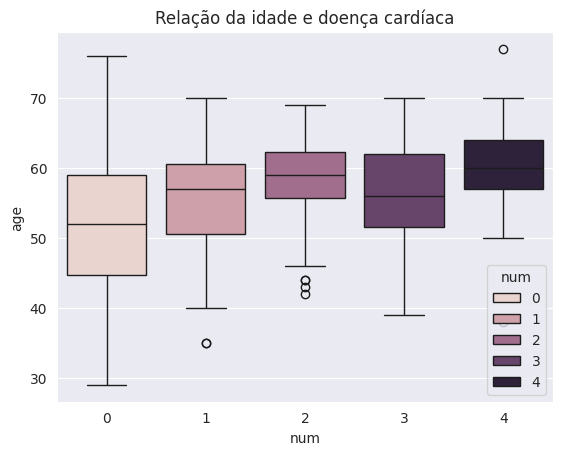

In [11]:
ax = sns.boxplot(x = 'num', y = 'age', hue = 'num', data = dados)
ax.set_title('Relação da idade e doença cardíaca')
ax

Comparação entre quantidade de pessoas que possuem ou não doença

In [12]:
alvo = dados['num']
alvo = [1 if num > 0 else 0 for num in alvo]

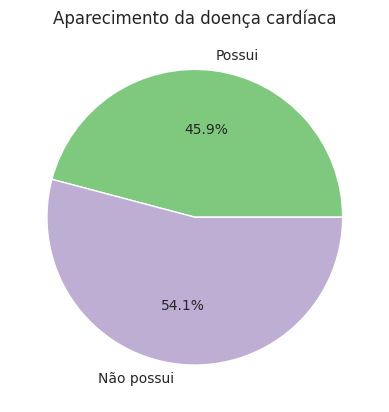

In [13]:
rotulo = ['Possui', 'Não possui']
tamanho = [alvo.count(1), alvo.count(0)]

fig = plt.pie(tamanho, labels = rotulo, autopct='%1.1f%%')
plt.title('Aparecimento da doença cardíaca')
plt.show()

## Correlação entre as variáveis

Podemos verificar qual a correlação entre as variáveis, especialmente com relação a presença ou ausência da doença. Nota-se que os valores de 'oldpeak', 'ca' e 'thal' tem correlação mais alta, enquanto 'fbs' e 'chol' tem pouca correlação.

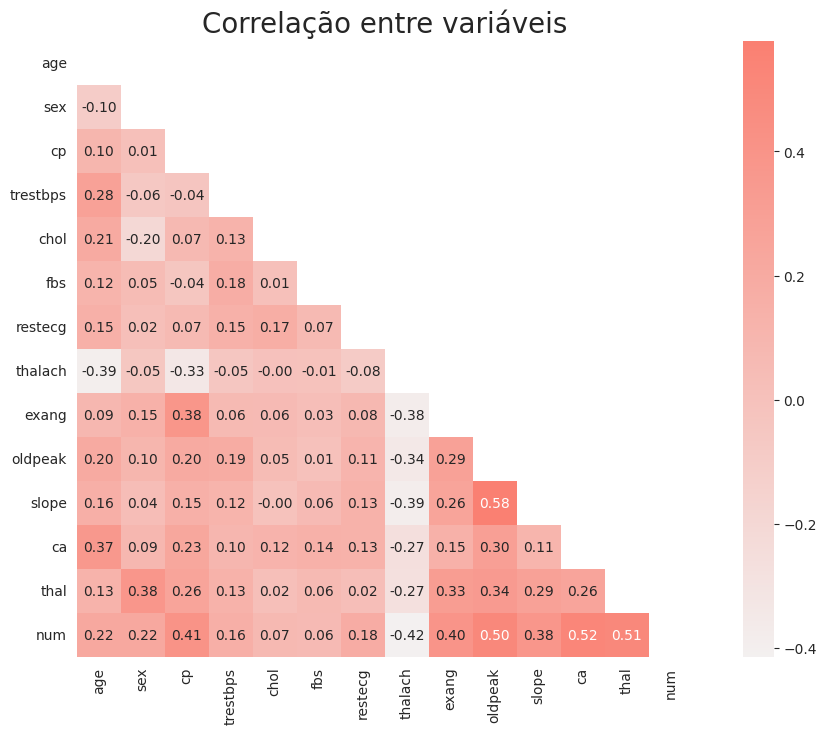

In [14]:
correlacao = dados.corr()
cores = sns.color_palette('light:salmon', as_cmap=True)
mascara = np.zeros_like(correlacao)
mascara[np.triu_indices_from(mascara)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize = (13,8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mascara, square = True, fmt = '.2f', annot = True)
  ax.set_title('Correlação entre variáveis', fontsize=20)

# Desenvolvimento do modelo

## Obtenção das variáveis explicativas e da variável alvo

Para desenvolver o modelo será necessário obter colunas que representam as variáveis categóricas.

In [15]:
variaveis_categoricas = dados[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']].columns
variaveis_categoricas

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [16]:
dados_dummies = dados[variaveis_categoricas].astype(str)
dados_dummies = pd.get_dummies(dados_dummies)
dados_dummies = dados_dummies.astype(int)
dados_dummies.head()

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0
2,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
4,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0


In [17]:
dados_com_dummies = pd.concat([dados.drop(variaveis_categoricas, axis=1), dados_dummies],axis=1)
dados_com_dummies.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,0,1,1,...,0,1,1,0,0,0,1,0,1,0
1,67,160,286,108,1.5,3.0,2,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,67,120,229,129,2.6,2.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
3,37,130,250,187,3.5,0.0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,41,130,204,172,1.4,0.0,0,1,0,0,...,0,1,1,0,1,0,0,1,0,0


Uma simplificação pertinente será dividir em apenas duas classes: aqueles que possuem doença cardíaca (1 ao 4) e os que não possuem.

In [18]:
dados_com_dummies['num'] = dados_com_dummies['num'].apply(lambda num: 1 if num > 0 else 0)
dados_com_dummies['num'].unique()

array([0, 1])

In [19]:
dados_com_dummies.shape

(303, 26)

## Criação do modelo

In [20]:
seed = 42

Transformaremos a variável alvo em um array de 2 elementos que informa a probabilidade de ter ou não ter a doença.

In [21]:
y = dados_com_dummies['num']
y = keras.utils.to_categorical(y)

Os dados serão normalizados, isto é, serão escalados para um valor entre 0 e 1, dessa forma os valores com diferentes escalas não atrapalharão o modelo

In [22]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler()
X = dados_com_dummies.drop('num', axis = 1)
X = escalador.fit_transform(X)

Divide-se o conjunto de dados em treino e teste

In [23]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=seed)

O modelo criado possuirá um número de neurônios de entradas igual ao número de características e o número de neurônios de saída igual ao número de classes. O número de neurônios na camada oculta foi encontrado treinando com diferentes valores e constatando qual possui as melhores métricas

In [24]:
n_entrada = X.shape[1]
n_oculta = 50
n_saida = y.shape[1]

O MLP será do tipo sequencial, com uma camada de entrada, uma camada oculta e uma camada de saída

In [25]:
modelo = keras.Sequential([
    keras.layers.InputLayer(input_shape=[n_entrada, ], name = 'entrada'),
    keras.layers.Dense(n_oculta, activation = 'relu', name = 'oculta', kernel_initializer=keras.initializers.RandomNormal(seed=seed)),
    keras.layers.Dense(n_saida, activation = 'sigmoid', name = 'saida')
])

As métricas relevantes são a acurácia, precisão e recall (sensibilidade). O algoritmo de otimização é o popular ADAM que combina o gradiente descendente estocástico com ideis de outros algoritmos como Momentum e RMSProp. A função de perda é a entropia cruzada, que dá uma medida comparativa da distribuição de probabilidade prevista e real dos rótulos.

In [26]:
from keras.metrics import Precision, Recall

modelo.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['categorical_accuracy', Precision(), Recall()]
)

Realiza-se o treino com 100 épocas

In [27]:
epocas = 100
historico = modelo.fit(X_treino, y_treino, epochs = epocas, validation_split = 0.3)

Epoch 1/100
6/6 [==============================] - 1s 66ms/step - loss: 0.6763 - categorical_accuracy: 0.5680 - precision: 0.5421 - recall: 0.6095 - val_loss: 0.6302 - val_categorical_accuracy: 0.7397 - val_precision: 0.6829 - val_recall: 0.7671
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6208 - categorical_accuracy: 0.7456 - precision: 0.6684 - recall: 0.7396 - val_loss: 0.5829 - val_categorical_accuracy: 0.8219 - val_precision: 0.7619 - val_recall: 0.8767
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5745 - categorical_accuracy: 0.7929 - precision: 0.7296 - recall: 0.8462 - val_loss: 0.5446 - val_categorical_accuracy: 0.8493 - val_precision: 0.7952 - val_recall: 0.9041
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5386 - categorical_accuracy: 0.8107 - precision: 0.7487 - recall: 0.8639 - val_loss: 0.5091 - val_categorical_accuracy: 0.8630 - val_precision: 0.7976 - val_recall: 0.9178
Epoch 5/100
6/6 [=

Por fim, avalia-se o modelo com os dados de teste. Foram obtidos bons valores de precisão, acurácia e recall.

* Boa acurácia dá uma medida geral de que o modelo classifica bem os pacientes, rotulando os doentes como doentes e os sadios como sadios.
* Boa precisão indica que o modelo está tendo poucos falsos positivos, isto é, chamando de doente quem é sadio
* Boa acurácia indica que o modelo está tendo poucos falsos negativos, isto é, chamando de sadio quem é doente.

In [33]:
metricas = modelo.evaluate(X_teste,y_teste)
print('A acurácia do modelo no teste foi de ', round(metricas[1], 4))
print('A precisão do modelo no teste foi de ', round(metricas[2], 4))
print('A sensibilidade do modelo no teste foi de ', round(metricas[3], 4))

2/2 [==============================] - 0s 9ms/step - loss: 0.3373 - categorical_accuracy: 0.8197 - precision: 0.8226 - recall: 0.8361
A acurácia do modelo no teste foi de  0.8197
A precisão do modelo no teste foi de  0.8226
A sensibilidade do modelo no teste foi de  0.8361


Neste gráfico pode-se constatar como as métricas foram evoluindo com o passar das épocas de treino.

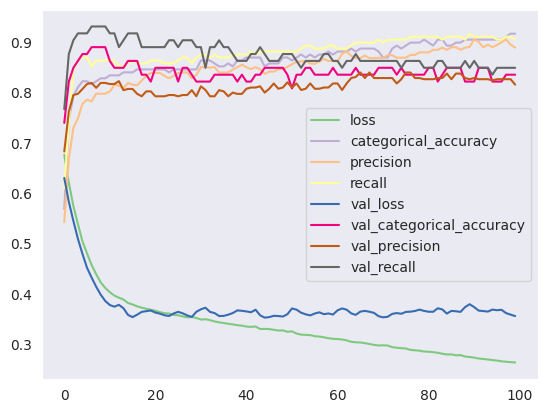

In [29]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

# Teste do modelo

Pode-se realizar um teste com um paciente, dados os valores de seus exames. Será necessário informar os valores de entrada incluindo as categorias criadas com dummies e os dados precisam ser normalizados.

In [30]:
entrada = np.array([60. , 130. , 210. , 135. ,   2.5,   2.  ,   0. ,   1. ,
         0. ,   0. ,   0. ,   1. ,   1. ,   0. ,   0. ,   0. ,   1. ,
         0. ,   1. ,   0. ,   1. ,   0. ,   0. ,   0., 1.])
entrada = entrada.reshape(1,-1)
entrada_escalada = escalador.transform(entrada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Por fim, realiza-se a predição com um paciente

In [31]:
predicao = modelo.predict([entrada_escalada])
if predicao[0][0] > 0.5:
  print("Presença de doença cardíaca pouco provável")
else:
  print("Presença de doença cardíaca muito provável")

1/1 [==============================] - 0s 88ms/step
Presença de doença cardíaca muito provável


In [32]:
predicao

array([[0.07483438, 0.9155462 ]], dtype=float32)